In [24]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import sklearn as skl

In [25]:
df_org=pd.read_csv('Office.csv')

In [26]:
# df_org.describe()
df_org.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95


In [27]:
df=pd.DataFrame()
df=pd.concat([df,df_org])
col_len = len(df['OrderDate'])
df['X']=np.random.uniform(0,100,col_len)
df['Y']=np.random.uniform(0,100,col_len)

In [28]:
df['Z']=(df['X']+df['Y'])/2

In [29]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,X,Y,Z
0,4-Jul-14,East,Richard,Pen Set,62,4.99,34.751314,73.323516,54.037415
1,12-Jul-14,East,Nick,Binder,29,1.99,10.829730,95.934536,53.382133
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,2.697159,93.102217,47.899688
3,29-Jul-14,East,Susan,Binder,81,19.99,24.962410,13.455831,19.209121
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95,64.753100,84.984083,74.868591


In [30]:
numberofelements=col_len
ZZ=np.arange(numberofelements)
T=np.array(list(zip(df['X'],df['Y'],df['Z'],ZZ)))

In [31]:
df2=pd.DataFrame({'X':T[:,0],'Y':T[:,1],'Z':T[:,2],
                     'ZZ':T[:,3]})

In [32]:
df_comb=pd.concat([df_org, df2], axis=1, sort=False)

In [33]:
df_comb.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,X,Y,Z,ZZ
0,4-Jul-14,East,Richard,Pen Set,62,4.99,34.751314,73.323516,54.037415,0.0
1,12-Jul-14,East,Nick,Binder,29,1.99,10.829730,95.934536,53.382133,1.0
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,2.697159,93.102217,47.899688,2.0
3,29-Jul-14,East,Susan,Binder,81,19.99,24.962410,13.455831,19.209121,3.0
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95,64.753100,84.984083,74.868591,4.0


In [34]:
df_comb.columns=df_comb.columns.str.replace('X','Demand')
df_comb.columns=df_comb.columns.str.replace('Y','Supply')
df_comb.columns=df_comb.columns.str.replace('ZZ','Index')
df_comb.columns=df_comb.columns.str.replace('Z','Projected Growth')

In [35]:
df_comb.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Demand,Supply,Projected Growth,Index
0,4-Jul-14,East,Richard,Pen Set,62,4.99,34.751314,73.323516,54.037415,0.0
1,12-Jul-14,East,Nick,Binder,29,1.99,10.829730,95.934536,53.382133,1.0
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,2.697159,93.102217,47.899688,2.0
3,29-Jul-14,East,Susan,Binder,81,19.99,24.962410,13.455831,19.209121,3.0
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95,64.753100,84.984083,74.868591,4.0


In [36]:
df_selctd=df_comb[(df_comb['Units']>20.0) & (df_comb['Unit Price']<100.0) & (df_comb['Demand']<500.0)]

In [37]:
df_selctd.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Demand,Supply,Projected Growth,Index
0,4-Jul-14,East,Richard,Pen Set,62,4.99,34.751314,73.323516,54.037415,0.0
1,12-Jul-14,East,Nick,Binder,29,1.99,10.829730,95.934536,53.382133,1.0
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,2.697159,93.102217,47.899688,2.0
3,29-Jul-14,East,Susan,Binder,81,19.99,24.962410,13.455831,19.209121,3.0
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95,64.753100,84.984083,74.868591,4.0


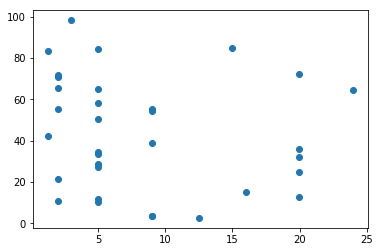

In [38]:
import matplotlib.pyplot as plt
plt.scatter(df_selctd['Unit Price'],df_selctd.Demand)
plt.show()

In [39]:
df_selctd.to_csv('Solution1.cvs')